In [21]:
import foolbox
import keras
from keras.preprocessing.image import ImageDataGenerator
from keras.models import load_model
import numpy as np
import pickle
import pandas as pd
from PIL import Image
import os
Image.MAX_IMAGE_PIXELS = 10000000000000000000  
import matplotlib.pyplot as plt

In [15]:
f = open('artifacts/preds_2', 'rb')
preds = pickle.load(f)
NON_AD = 1
AD = 0

In [16]:
misclassified = 0
i = 0
for filename in preds:
    pred_label = np.argmax(preds[filename])
    if pred_label == NON_AD:
        misclassified += 1
n = len(preds.keys())

In [17]:
print(misclassified)
print(n)

0
5599


In [26]:
f = open('artifacts/adversarial_images_0', 'rb')
ai = pickle.load(f)

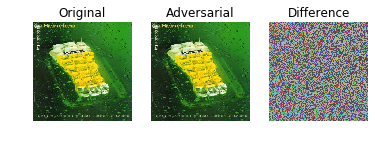

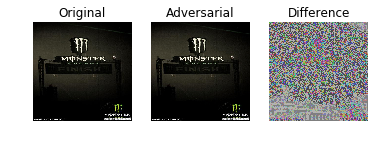

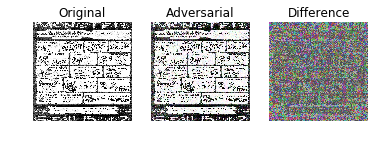

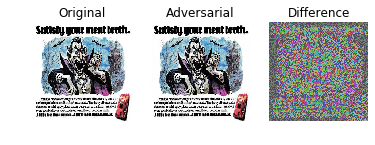

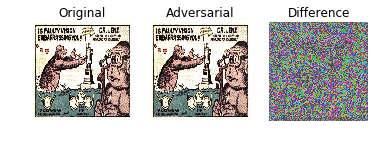

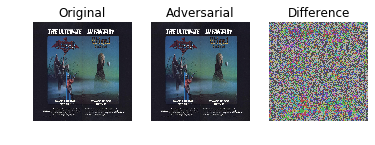

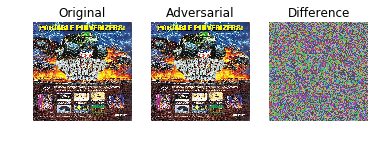

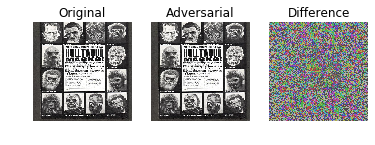

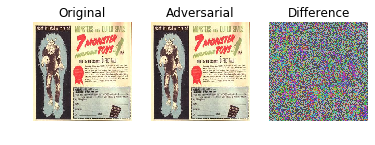

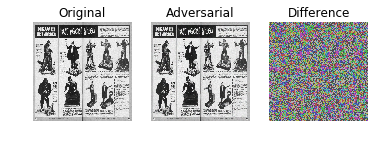

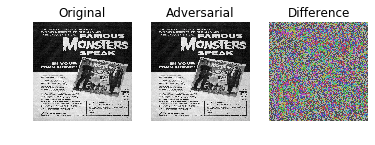

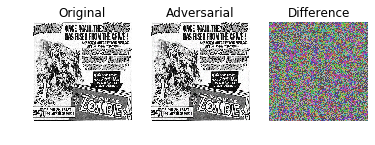

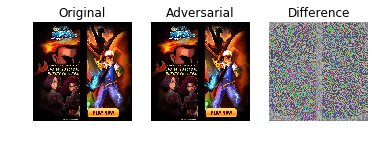

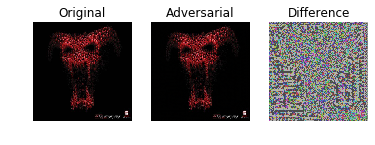

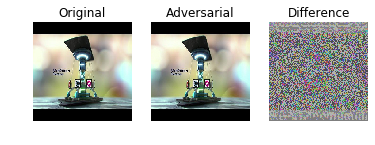

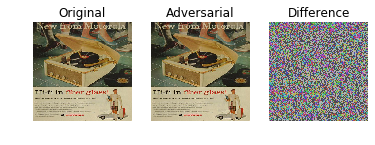

In [66]:
i = 0
for k in ai:
    adversarial = ai[k]
    img = Image.open(k)
    img = img.resize((224, 224))
    image = np.asarray(img, dtype=np.float32)
    plt.figure()

    plt.subplot(1, 3, 1)
    plt.title('Original')
    plt.imshow(image / 255)  # division by 255 to convert [0, 255] to [0, 1]
    plt.axis('off')

    plt.subplot(1, 3, 2)
    plt.title('Adversarial')
    plt.imshow(adversarial[:, :, ::-1] / 255)  # ::-1 to convert BGR to RGB
    plt.axis('off')

    plt.subplot(1, 3, 3)
    plt.title('Difference')
    difference = adversarial[:, :, ::-1] - image
    plt.imshow(difference / abs(difference).max() * 0.2 + 0.5)
    plt.axis('off')

    plt.show()
    i += 1
    if i > 15:
        break

In [59]:
data = {}
data["Images"] = []
data["Successful Evasions"] = []
data["Percent Evaded"] = []
for i in range(0, 10):
    with open('artifacts/stats_'+str(i), 'r') as f:
        content = f.readlines()
        files = content[0]
        evasions = content[1]
        files = files.split(':')[1][1:-1]
        evasions = evasions.split(':')[1][1:-1]
        data["Images"].append(files)
        data["Successful Evasions"].append(evasions)
        data["Percent Evaded"].append(str(round((int(evasions)*100)/(int(files)), 2))+"%")
print(data)

{'Images': ['5673', '5433', '5599', '5694', '5716', '5677', '5616', '5657', '5620', '5799'], 'Successful Evasions': ['3002', '2802', '2883', '2963', '2998', '2953', '2959', '3033', '2993', '3076'], 'Percent Evaded': ['52.92%', '51.57%', '51.49%', '52.04%', '52.45%', '52.02%', '52.69%', '53.61%', '53.26%', '53.04%']}


In [62]:
import pandas as pd
df = pd.DataFrame(data)
df = df[['Images', 'Successful Evasions', 'Percent Evaded']]

In [63]:
print(df)

  Images Successful Evasions Percent Evaded
0   5673                3002         52.92%
1   5433                2802         51.57%
2   5599                2883         51.49%
3   5694                2963         52.04%
4   5716                2998         52.45%
5   5677                2953         52.02%
6   5616                2959         52.69%
7   5657                3033         53.61%
8   5620                2993         53.26%
9   5799                3076         53.04%


In [64]:
tex = df.to_latex()

In [65]:
print(tex)

\begin{tabular}{llll}
\toprule
{} & Images & Successful Evasions & Percent Evaded \\
\midrule
0 &   5673 &                3002 &         52.92\% \\
1 &   5433 &                2802 &         51.57\% \\
2 &   5599 &                2883 &         51.49\% \\
3 &   5694 &                2963 &         52.04\% \\
4 &   5716 &                2998 &         52.45\% \\
5 &   5677 &                2953 &         52.02\% \\
6 &   5616 &                2959 &         52.69\% \\
7 &   5657 &                3033 &         53.61\% \\
8 &   5620 &                2993 &         53.26\% \\
9 &   5799 &                3076 &         53.04\% \\
\bottomrule
\end{tabular}

